# Data Wrangling and Cleaning

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# convert year, month and day to one datetime object
flights=pd.read_csv('flights.csv', low_memory=False, parse_dates=[[1, 2]], 
                    date_parser=lambda *columns: datetime(2015, *map(int, columns)), index_col=0)

In [3]:
# filter only CHI - BOS flights and BOS - CHI

ORIG = flights['ORIGIN_AIRPORT'].isin(['ORD','BOS'])
DEST = flights['DESTINATION_AIRPORT'].isin(['ORD','BOS'])
flights_clean = flights[ORIG & DEST]
flights_clean.is_copy = False
flights_clean['DATE']=flights_clean.index

In [4]:
# delete rows with any missing information in ARRIVAL_DELAY column - essentially filters out all cancellations 
flights_clean = flights_clean.dropna(subset=['ARRIVAL_DELAY']) 
flights_clean.head()


,YEAR,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
MONTH_DAY,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,-33.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,UA,1198,N38451,BOS,ORD,600,557.0,-3.0,...,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,UA,521,N854UA,BOS,ORD,700,700.0,0.0,...,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,AA,1247,N3CHAA,BOS,ORD,700,659.0,-1.0,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2015-01-01,2015,4,B6,111,N267JB,BOS,ORD,715,710.0,-5.0,...,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [5]:
# weather data
weather=pd.read_csv('weather.csv', low_memory=False, index_col=0)
# convert weather date to datetime
weather['DATE'] = pd.to_datetime(weather['DATE'])
weather['ORIGIN_AIRPORT'] = np.where(weather['NAME'] == 'BOSTON, MA US', 'BOS', 'ORD')
weather.head()

,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,EVAP,...,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,ORIGIN_AIRPORT
STATION,,,,,,,,,,,,,,,,,,,,,
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD
US1ILCK0148,"OAK LAWN 1.9 SE, IL US",41.6936,-87.729,182.3,2015-03-27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ORD


In [6]:
# merge the data together 
w_f = flights_clean.merge(weather, how = 'inner', on = ['DATE', 'ORIGIN_AIRPORT'])
w_f.head()

,YEAR,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,4,B6,1012,N375JB,ORD,BOS,540,529.0,-11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ohare_boston = w_f['NAME'].isin(['CHICAGO OHARE INTERNATIONAL AIRPORT, IL US', 'BOSTON, MA US'])
w_f = w_f[ohare_boston]
w_f = w_f.dropna(axis=1, how='all')
w_f.reset_index()

# deleted unnecessary columns - all that deleted had over half the data missing 
w_f = w_f.dropna(axis=1, how='any')

# utilize function to make unique ids to delete duplicates
def make_identifier(df):
    str_id = df.apply(lambda x: '_'.join(map(str, x)), axis=1)
    return pd.factorize(str_id)[0]

w_f['combined_id'] = make_identifier(w_f[['DATE','DEPARTURE_TIME', 'TAIL_NUMBER']])
# drop duplicates 
w_f = w_f.drop_duplicates(subset=['combined_id'], keep='first')
w_f = w_f.reset_index()

In [8]:
import scipy.stats as stats
import pylab

# check departure delay for extreme values
w_f.DEPARTURE_DELAY.sort_values()
# delete extreme values
w_f = w_f.drop(w_f[w_f['DEPARTURE_DELAY'] > 460].index)

In [9]:
# create new variable to identify whether a delay occured or not and if it was departure or arrival
w_f.is_copy = False
w_f['AD_TAG'] = w_f.ARRIVAL_DELAY.map( lambda x: 1 if x > 0 else 0)
w_f['DD_TAG'] = w_f.DEPARTURE_DELAY.map( lambda x: 1 if x > 0 else 0)
# create a variable for delay 
w_f['DELAY'] = np.where(w_f['DD_TAG']==1, 1, (np.where(w_f['AD_TAG']==1, 1, 0)))
# count delay vs. non delay
print(w_f['DELAY'].value_counts())

1    6467
0    6273
Name: DELAY, dtype: int64


# EDA and Inferential Statistics

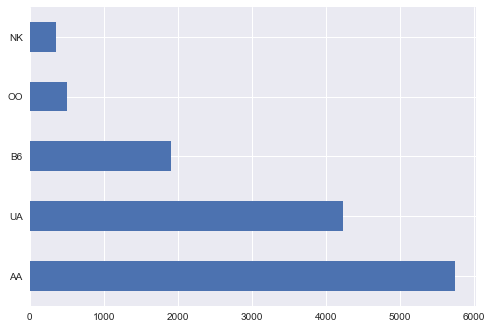

ORD    6374
BOS    6366
Name: ORIGIN_AIRPORT, dtype: int64
BOS    6374
ORD    6366
Name: DESTINATION_AIRPORT, dtype: int64


In [10]:
# Initial exploration

# Counts of each airline
w_f['AIRLINE'].value_counts().plot(kind='barh')
plt.show()
# count of boston vs. chicago departures
print(w_f['ORIGIN_AIRPORT'].value_counts())
# count of boston vs. chicago arrivals
print(w_f['DESTINATION_AIRPORT'].value_counts())

There are 5 airlines that run between Chicago and Boston in this dataset. American Airlines has the highest count of ~5800 flights while Spirit Airlines has the lowest count of ~300. 

Confirms that there are about equal amounts of Boston and Chicago departues and arrivals. 

DAY AA:
0    3357
1    2387
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


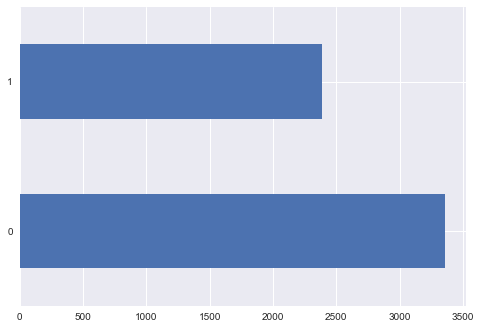

DAY B6:
1    974
0    933
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


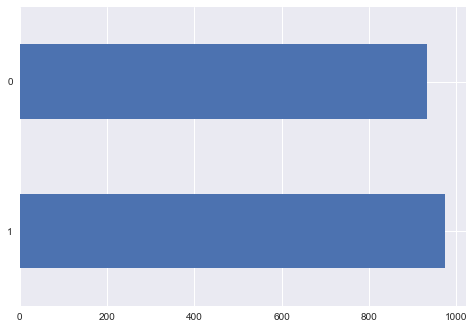

DAY NK:
1    241
0    111
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


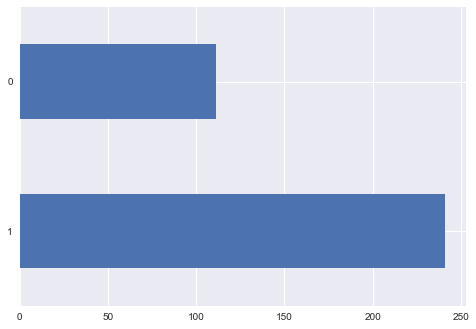

DAY OO:
1    287
0    216
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


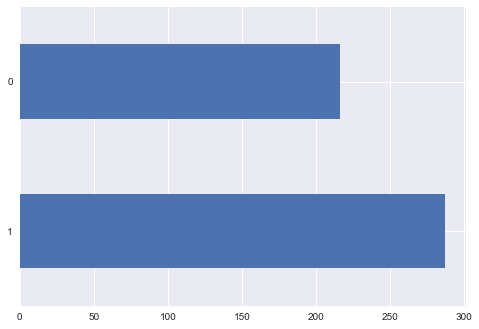

DAY UA:
1    2578
0    1656
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


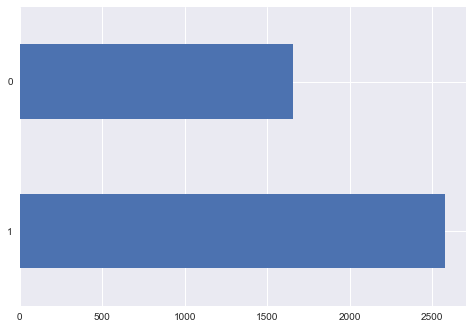

In [11]:
# how many delays are there each day of the week?
airline_group = w_f.groupby('AIRLINE')
for name, group in airline_group:
    print("DAY {}:".format(name))
    print(group.DELAY.value_counts())
    print(group.DELAY.value_counts().plot(kind='barh'))
    plt.show()

In [13]:
# comparing proportion of delays between American and United
# determine sample sizes
american = w_f[w_f.AIRLINE=='AA']
other = w_f[w_f.AIRLINE=='UA']
american_size = len(american)
other_size = len(other)

# determine number of delays
delay_a = len(american[american.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_a = delay_a/american_size
prop_delay_o = delay_o/other_size
print(prop_delay_a)
print(prop_delay_o)


"""
Ho: prop_delay_a=prop_delay_o
Ha: prop_delay_a!=prop_delay_o
"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_a*(1-prop_delay_a) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ american_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_a-prop_delay_o-1.96*margin,prop_delay_a-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_a,delay_o]),np.array([other_size,american_size]),value=0)

0.4155640668523677
0.6088804912612187
[-0.23150543728401984, -0.15512741153368215]


(11.350564653767691, 7.3685302741049892e-30)

P-value of 0, reject null hypothesis that proportion of delays is the same between American and United. United has more. We are the 95% that the difference in proportions is between -.232 and -.155. 

In [380]:
# refer back to original flights_clean dataset - 2923 Delays had atleast one reason documented 
flights_clean
# will identify frequency of those reasons below
flights_clean.ORIGIN_AIRPORT.value_counts()

ORD    6378
BOS    6368
Name: ORIGIN_AIRPORT, dtype: int64

In [381]:
# how many weather delays did the dataset originally account for - multiple types can occur at once
weather = flights_clean.dropna(subset=['WEATHER_DELAY'])
x = weather.WEATHER_DELAY.count()
weather.WEATHER_DELAY.value_counts()
# found count at 0 and subtracted from total
count_1 = x - 2694

# how many late aircraft delays did the dataset originally account for - multiple types can occur at once
late = flights_clean.dropna(subset=['LATE_AIRCRAFT_DELAY'])
x = late.LATE_AIRCRAFT_DELAY.count()
late.LATE_AIRCRAFT_DELAY.value_counts()
# found count at 0 and subtracted from total
count_2 = x - 1513

# how many airline delays did the dataset originally account for - multiple types can occur at once
airline = flights_clean.dropna(subset=['AIRLINE_DELAY'])
x = airline.AIRLINE_DELAY.count()
airline.AIRLINE_DELAY.value_counts()
# found count at 0 and subtracted from total
count_3 = x - 1531

# how many security delays did the dataset originally account for - multiple types can occur at once
security = flights_clean.dropna(subset=['SECURITY_DELAY'])
x = security.SECURITY_DELAY.count()
security.SECURITY_DELAY.value_counts()
# found count at 0 and subtracted from total
count_4 = x - 2920

# how many air system delays did the dataset originally account for - multiple types can occur at once
system = flights_clean.dropna(subset=['AIR_SYSTEM_DELAY'])
x = system.AIR_SYSTEM_DELAY.count()
system.AIR_SYSTEM_DELAY.value_counts()
# found count at 0 and subtracted from total
count_5 = x - 1187

print("Weather:{}".format(count_1),
     "Aircraft:{}".format(count_2),
     "Airline:{}".format(count_3),
     "Security:{}".format(count_4),
     "Air System:{}".format(count_5))

Weather:229 Aircraft:1410 Airline:1392 Security:3 Air System:1736


Air System was the highest, while security was the lowest. Weather was a lot lower than expected at only 229 of the
2923 delays (that had reasons documented).

In [382]:
# how many have an arrival and departure delay
d_d = w_f['DD_TAG']==1
a_d = w_f['AD_TAG']==1
both = w_f[a_d & d_d]
both['DD_TAG'].count()

3750

In [383]:
# how many only have a departure delay
d_d = w_f['DD_TAG']==1
no_ad = w_f['AD_TAG']==0
d_only = w_f[d_d & no_ad]
d_only['DD_TAG'].count()

1587

In [384]:
# how many only have an arrival delay
no_dd = w_f['DD_TAG']==0
only_ad = w_f['AD_TAG']==1
d_only = w_f[no_dd & only_ad]
d_only['AD_TAG'].count()

1130

DAY 1:
1    952
0    926
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


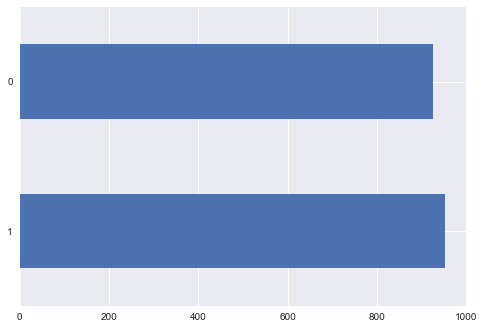

DAY 2:
1    1017
0     909
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


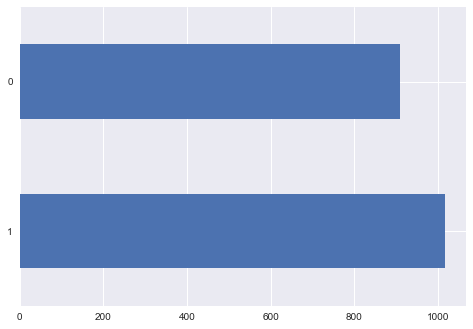

DAY 3:
1    1008
0     971
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


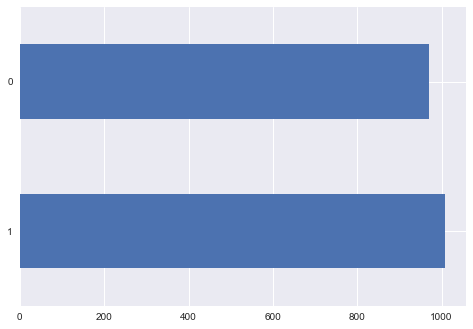

DAY 4:
1    1037
0     896
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


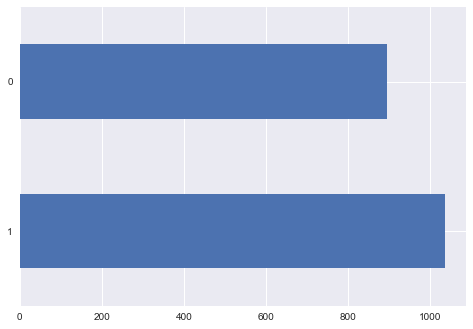

DAY 5:
1    986
0    931
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


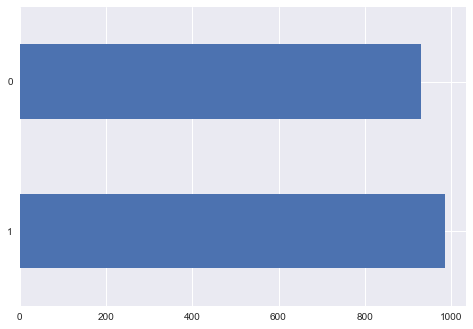

DAY 6:
0    773
1    582
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


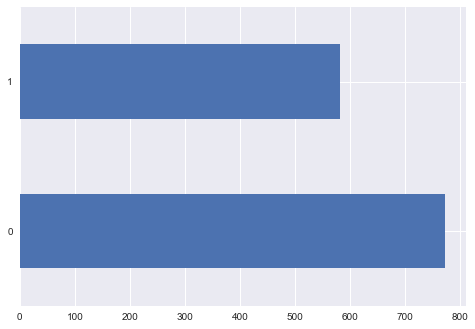

DAY 7:
1    885
0    867
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


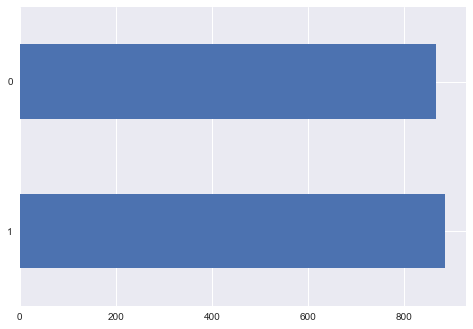

In [385]:
# how many delays are there each day of the week?
week_group = w_f.groupby('DAY_OF_WEEK')
for name, group in week_group:
    print("DAY {}:".format(name))
    print(group.DELAY.value_counts())
    print(group.DELAY.value_counts().plot(kind='barh'))
    plt.show()

In [15]:
# identify each season
w_f['SEASON'] = np.where((w_f['DATE'] >= '2015-01-01') & (w_f['DATE'] < '2015-03-21'), 'Winter', 
                np.where((w_f['DATE'] >= '2015-03-21') & (w_f['DATE'] < '2015-06-21'), 'Spring', 
                np.where((w_f['DATE'] >= '2015-06-21') & (w_f['DATE'] < '2015-09-22'), 'Summer',
                np.where((w_f['DATE'] >= '2015-09-22') & (w_f['DATE'] < '2015-12-21'), 'Fall', 'Winter'))))    
                         

In [16]:
# frequency of flights each season
w_f.SEASON.value_counts()

Summer    4162
Spring    3703
Winter    2574
Fall      2301
Name: SEASON, dtype: int64

Season Fall:
0    1485
1     816
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


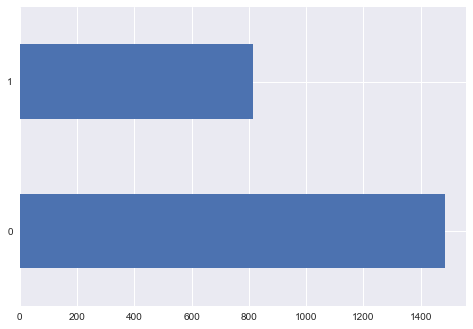

Season Spring:
1    1883
0    1820
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


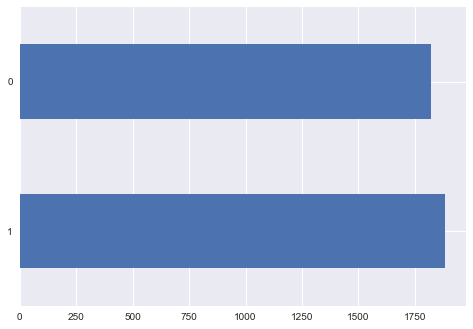

Season Summer:
1    2169
0    1993
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


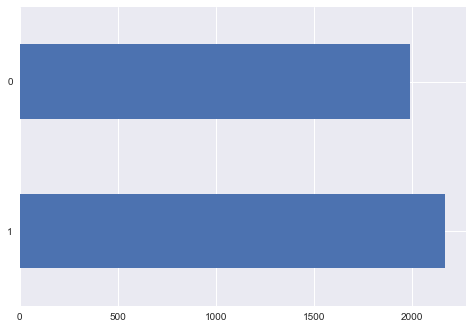

Season Winter:
1    1599
0     975
Name: DELAY, dtype: int64
Axes(0.125,0.125;0.775x0.755)


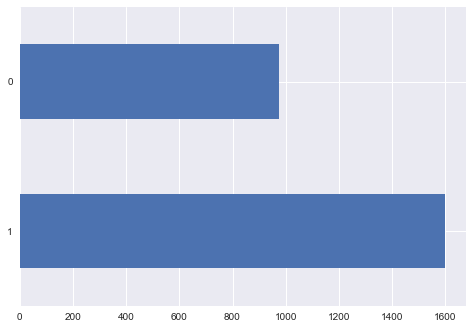

In [17]:
# how many delays are there each season?
season_group = w_f.groupby('SEASON')
for name, group in season_group :
    print("Season {}:".format(name))
    print(group.DELAY.value_counts())
    print(group.DELAY.value_counts().plot(kind='barh'))
    plt.show()


In [21]:
# does season have a statistically significant effect on the amount of delays?

# summer vs. winter
winter = w_f[w_f.SEASON=='Winter']
other = w_f[w_f.SEASON=='Summer']
winter_size = len(winter)
other_size = len(other)

# determine number of delays
delay_w = len(winter[winter.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_w = delay_w/winter_size
prop_delay_o = delay_o/other_size
print(prop_delay_w)
print(prop_delay_o)

0.6212121212121212
0.5211436809226333


Hypothesis:

Ho: prop_delay_s=prop_delay_o
Ha: prop_delay_s!=prop_delay_o

In [22]:
import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_w*(1-prop_delay_w) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ winter_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_w-prop_delay_o-1.96*margin,prop_delay_w-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_w,delay_o]),np.array([other_size,winter_size]),value=0)

[0.05247466474017054, 0.1476622158388053]


(-36.827910671099801, 6.6027558761941656e-297)

P-value of 0, reject null hypothesis that proportion of delays is the same between summer and winter. Winter has more. 95% confident that the difference in proportions is between .052 and .148. 

In [23]:
# summer vs. winter
winter = w_f[w_f.SEASON=='Winter']
other = w_f[w_f.SEASON=='Fall']
winter_size = len(winter)
other_size = len(other)

# determine number of delays
delay_w = len(winter[winter.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_w = delay_w/winter_size
prop_delay_o = delay_o/other_size
print(prop_delay_w)
print(prop_delay_o)

"""Hypothesis:

Ho: prop_delay_s=prop_delay_o
Ha: prop_delay_s!=prop_delay_o"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_w*(1-prop_delay_w) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ winter_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_w-prop_delay_o-1.96*margin,prop_delay_w-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_w,delay_o]),np.array([other_size,winter_size]),value=0)

0.6212121212121212
0.3546284224250326
[0.213466975074191, 0.3197004224999862]


(26.345075048700568, 5.8446179195098188e-153)

P-value of 0, reject null hypothesis that proportion of delays is the same between winter and fall. Winter has more. 95% confident that the difference in proportions is between .21 and .31. 

In [24]:
# summer vs. winter
winter = w_f[w_f.SEASON=='Winter']
other = w_f[w_f.SEASON=='Spring']
winter_size = len(winter)
other_size = len(other)

# determine number of delays
delay_w = len(winter[winter.DELAY == 1])
delay_o = len(other[other.DELAY == 1])

# determine proportion of delays
prop_delay_w = delay_w/winter_size
prop_delay_o = delay_o/other_size
print(prop_delay_w)
print(prop_delay_o)

"""Hypothesis:

Ho: prop_delay_s=prop_delay_o
Ha: prop_delay_s!=prop_delay_o"""

import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_w*(1-prop_delay_w) / other_size) + 
                          (prop_delay_o*(1-prop_delay_o)/ winter_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_w-prop_delay_o-1.96*margin,prop_delay_w-prop_delay_o+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_w,delay_o]),np.array([other_size,winter_size]),value=0)

0.6212121212121212
0.5085066162570888
[0.06401527223230782, 0.16139573767775697]


(-23.501099591131105, 3.9745013914199538e-122)

P-value of 0, reject null hypothesis that proportion of delays is the same between winter and spring. Winter has more delays. 95% confident that difference in proportions is between .06 and .16.

Safe to say from this analysis that winter does have the highest proportion of delays. 

In [393]:
# does airport have a significant effect on delays?

# determine sample sizes again
ord_orig = w_f[w_f.ORIGIN_AIRPORT=='ORD']
bos_orig = w_f[w_f.ORIGIN_AIRPORT=='BOS']
ord_size = len(ord_orig)
bos_size = len(bos_orig)
print(ord_size)
print(bos_size)

# determine number of delays again 
delay_o = len(ord_orig[ord_orig.DELAY == 1])
delay_b = len(bos_orig[bos_orig.DELAY == 1])
print(delay_o)
print(delay_b)

6374
6366
3288
3179


In [394]:
# determine proportion of delays
prop_delay_o = delay_o/ord_size
prop_delay_b = delay_b/bos_size
print(prop_delay_o)
print(prop_delay_b)

0.5158456228427989
0.4993716619541313


Hypothesis:

Ho: prop_delay_o=prop_delay_b
Ha: prop_delay_o!=prop_delay_b

In [395]:
import math
# compute margin
margin = 1.96 * math.sqrt( ( prop_delay_o*(1-prop_delay_o) / bos_size) + 
                          (prop_delay_b*(1-prop_delay_b)/ ord_size) )

# compute confidence interval for difference in proportion 
confidence_int= [prop_delay_o-prop_delay_b-1.96*margin,prop_delay_o-prop_delay_b+1.96*margin]
print(confidence_int)

# proportions ztest
from statsmodels.stats.proportion import proportions_ztest as pz
pz(np.array([delay_o,delay_b]),np.array([bos_size,ord_size]),value=0)

[-0.017552611449394073, 0.05050053322672926]


(2.0035869948090332, 0.045114320125785611)

p-value low enough to reject null hypothesis, there is a slight difference in proportion of delays. Much more likely that Ohare will have more as confidence interval is -.01 to .05.  

# Machine Learning

## Data Prep

In [405]:
# normalize continuous variables used in Logistic Regression
from sklearn import preprocessing

w_f['SNOW'].fillna((w_f['SNOW'].mean()), inplace=True)

# Create x, where x the 'scores' column's values as floats
snow = w_f[['SNOW']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
snow_scaled = min_max_scaler.fit_transform(snow)

# Run the normalizer on the dataframe
snow_normalized = pd.DataFrame(snow_scaled)
# change values 
w_f['SNOW']= snow_normalized
w_f['SNOW'].fillna((w_f['SNOW'].mean()), inplace=True)

In [406]:
# normalize prcp
from sklearn import preprocessing

w_f['PRCP'].fillna((w_f['PRCP'].mean()), inplace=True)

# Create x, where x the 'scores' column's values as floats
prcp = w_f[['PRCP']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
prcp_scaled = min_max_scaler.fit_transform(prcp)

# Run the normalizer on the dataframe
prcp_normalized = pd.DataFrame(prcp_scaled)
# change values 
w_f['PRCP']= prcp_normalized
w_f['PRCP'].fillna((w_f['PRCP'].mean()), inplace=True)

In [407]:
# normalize awnd
from sklearn import preprocessing

w_f['AWND'].fillna((w_f['AWND'].mean()), inplace=True)

# Create x, where x the 'scores' column's values as floats
wind = w_f[['AWND']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
wind_scaled = min_max_scaler.fit_transform(wind)

# Run the normalizer on the dataframe
wind_normalized = pd.DataFrame(wind_scaled)
# change values 
w_f['AWND']= wind_normalized
w_f['AWND'].fillna((w_f['AWND'].mean()), inplace=True)

In [408]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split,  cross_val_score
from sklearn.metrics import accuracy_score

# redefined as dflogit before dummy variables
dflogit_1=w_f

In [409]:
# created dumby variables
for elem in dflogit_1['DAY_OF_WEEK']:
    dflogit_1[str(elem)] = dflogit_1['DAY_OF_WEEK'] == elem
    
for elem in dflogit_1['AIRLINE']:
    dflogit_1[str(elem)] = dflogit_1['AIRLINE'] == elem
    
for elem in dflogit_1['SEASON']:
    dflogit_1[str(elem)] = dflogit_1['SEASON'] == elem
    
for elem in dflogit_1['ORIGIN_AIRPORT']:
    dflogit_1[str(elem)] = dflogit_1['ORIGIN_AIRPORT'] == elem

for elem in dflogit_1['DESTINATION_AIRPORT']:
    dflogit_1[str(elem)] = dflogit_1['DESTINATION_AIRPORT'] == elem

## Logistic Regression

In [410]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflogit_1[['4', '5', '6', '7',
       '1', '2', 'B6', 'AA', 'UA', 'OO', 'Winter', 'Spring',
       'Summer', 'ORD', 'AWND', 'PRCP', 'SNOW']].values, (dflogit_1.DELAY == 1).values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.613500784929


In [432]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [433]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           dflogit_1,['4', '5', '6', '7',
       '1', '2', 'B6', 'AA', 'UA', 'OO', 'Winter', 'Spring',
       'Summer', 'ORD', 'AWND', 'PRCP', 'SNOW'], 'DELAY',1)

BEST PARAMS {'C': 100}
Accuracy on training data: 0.61
Accuracy on test data:     0.62


In [434]:
clf_l.coef_

array([[ 0.06801179, -0.00723734, -0.36000222,  0.01717785, -0.00872119,
         0.08431363, -0.87133272, -1.26193962, -0.43451794, -0.76629544,
         1.15739307,  0.71960286,  0.76979864, -0.05838496,  0.37456666,
         1.37529539,  6.22931218]])

Snow is the most influential feature. PRCP is 2nd most influential. 

Weekday coefficients: Wednesday, Thursday, Saturday, Monday all contribute to a higher likelihood of delay than Tuesday. Friday and Saturday all contribute to a lower likelihood of delay.

Airline Coefficients: Spirit Airlines appears to have the lowest contribution to a delay. B6, AA, UA, and OO are all negative. 

Season Coefficients: Fall appears to have the lowest contribution to a delay. Winter, Spring, and Summer are all positive. 

Airport Coefficients: Boston appears to have a higher contribution to delay than Chicago. 

## Random Forest

In [453]:
forest_params = {'min_samples_split': [8, 16], 
                 'min_samples_leaf': [4, 8]}
rfc = GridSearchCV(RandomForestClassifier(), forest_params, cv=5)
rfc.fit(Xlr, ylr)
rfc.score(Xtest_l, ytest_l)

0.68328100470957609

In [454]:
rfc.best_estimator_.feature_importances_

array([ 0.02037066,  0.02340269,  0.02493036,  0.01866392,  0.02143739,
        0.0236292 ,  0.01805217,  0.0967215 ,  0.05179099,  0.00906764,
        0.06062129,  0.03264484,  0.03397921,  0.04489406,  0.30989359,
        0.16095135,  0.04894913])

Random forest performs slightly better. Most important features are Wind and Precipitation.